In [1]:
from sklearn.datasets import load_iris
iris = load_iris()


print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [85]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [86]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [87]:
print(iris.data.shape)

(150, 4)


In [88]:
# define TEST and TRAIN
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y)


In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# get mean and std to scale
scaler.fit(X)
# scale data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# create dictionary for scores
scores = {}
scores_list = []
limit = 20

# tally scores for values of k
for k in range(1,limit):
    cls = KNeighborsClassifier(n_neighbors=k)
    cls.fit(X_train, y_train)
    y_pred = cls.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(scores[k])

In [91]:
print(len(scores_list))

19


Text(0, 0.5, 'Accuracy')

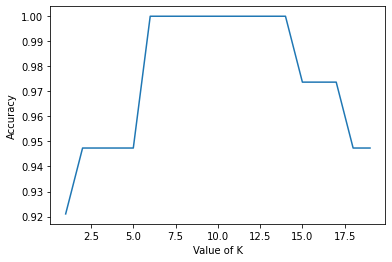

In [92]:
import matplotlib.pyplot as plt
plt.plot(range(1,limit), scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [96]:
# use best value of k in model

cls = KNeighborsClassifier(n_neighbors=8)
cls.fit(X_train, y_train)

res = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", res)

# res = metrics.multilabel_confusion_matrix(y_test, y_pred)
# print("Mutli Confusion Matrix: \n", res)

res = metrics.classification_report(y_test, y_pred)
print("Classification Matrix: \n", res)

Confusion Matrix: 
 [[13  0  0]
 [ 0 14  1]
 [ 0  1  9]]
Classification Matrix: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [97]:
import numpy as np
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print("precision ", PPV)
print("false pos", FP)
print("false neg", FN)
#print("accuracy ", ACC)

precision  [1.000 0.933 0.900]
false pos [0 1 1]
false neg [0 1 1]
